In [40]:
from numpy import logical_and as land, logical_or as lor
import pandas as pd
import numpy as np
import seaborn as sn
from matplotlib import pyplot as plt
import math
from utilities import to_float

In [41]:
DATA_PATH = 'data/'

In [42]:
df_users = pd.read_csv("data/users.csv")
df_tweet = pd.read_csv("data/tweets.csv")

# Correlation analysis

In [43]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   id              object
 1   user_id         object
 2   retweet_count   object
 3   reply_count     object
 4   favorite_count  object
 5   num_hashtags    object
 6   num_urls        object
 7   num_mentions    object
 8   created_at      object
 9   text            object
dtypes: object(10)
memory usage: 1.0+ GB


In [44]:
attributes = ['retweet_count', 'reply_count', 'favorite_count', 'num_hashtags', 'num_urls', 'num_mentions']
for attr in attributes:
    df_tweet[attr] = df_tweet[attr].apply(to_float)

In [45]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              object 
 1   user_id         object 
 2   retweet_count   float64
 3   reply_count     float64
 4   favorite_count  float64
 5   num_hashtags    float64
 6   num_urls        float64
 7   num_mentions    float64
 8   created_at      object 
 9   text            object 
dtypes: float64(6), object(4)
memory usage: 1.0+ GB


In [46]:
df_corr = df_tweet.copy()
df_corr.drop(columns=['id', 'user_id'], inplace=True)
for attr in attributes:
    df_corr = df_corr[land(land(df_corr[attr] != -1, ~df_corr[attr].isnull()), df_corr[attr] != np.inf)]

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_24276\2037299467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_corr.corr(method=method)


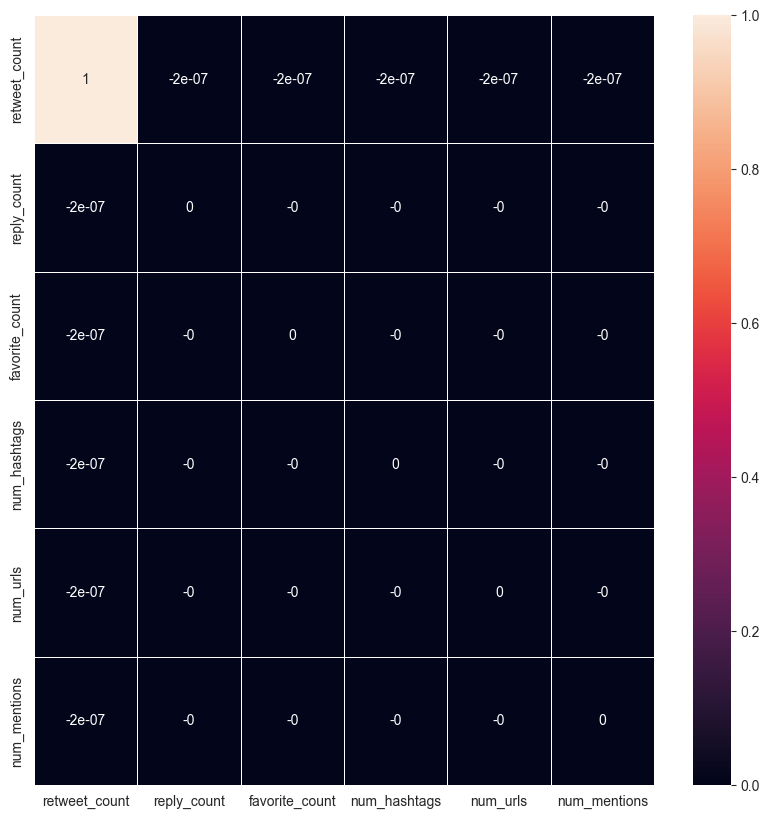

In [47]:
eval_correlation(df_corr)

In [ ]:
df_tweet.drop(columns=['id', 'user_id'])
for attr in attributes:
    df_corr = df_corr[land(land(df_corr[attr] != -1, ~df_corr[attr].isnull()), df_corr[attr] != np.inf)]

In [32]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [38]:
df_corr = df_users.copy()
df_corr.drop(columns=['id', 'name', 'lang', 'bot'], inplace=True)
df_users['statuses_count'] = df_users['statuses_count'].apply(to_float)
df_corr = df_corr[land(land(df_corr['statuses_count'] != -1, ~df_corr['statuses_count'].isnull()), df_corr['statuses_count'] != np.inf)]
df_corr['created_at'] = pd.to_datetime(df_corr['created_at']).astype(np.int64)

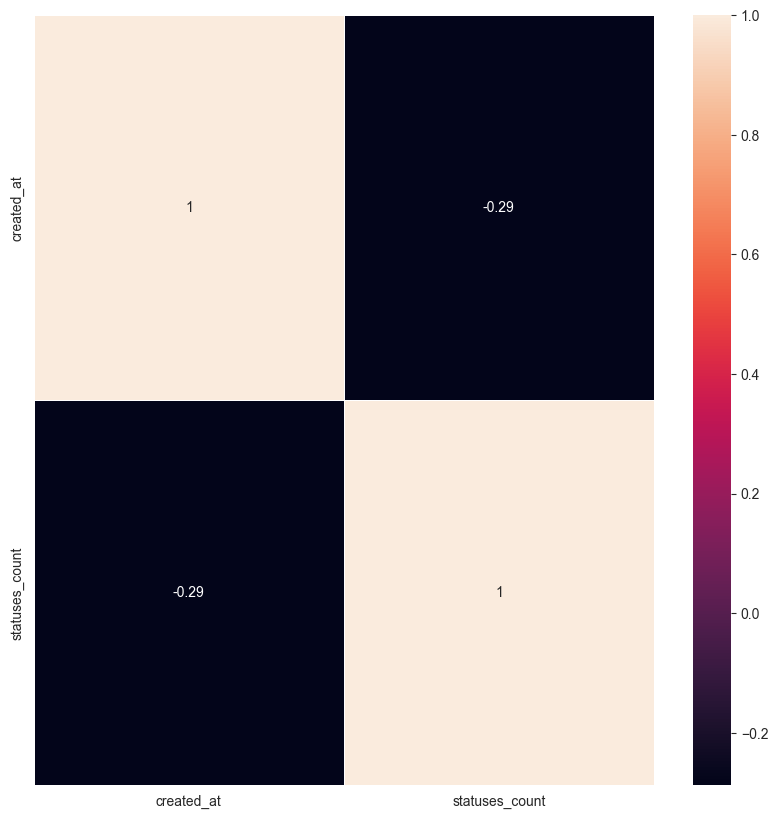

In [39]:
eval_correlation(df_corr)